In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Formating options for the plots
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 25,
          'legend.fontsize': 21.5,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'font.family': 'serif',
          'font.size': 25,
          #'font.serif': ['Palatino'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# # Parameters
S1 = {'kstex':300,         
     'kstot':2016.66,   
     'alpha':580,
     'beta':6}

S2 = {'kstex':50,         
     'kstot':506.54,    
     'alpha':580,
     'beta':6}

S4 = {'kstex':10,      
     'kstot': 100,     
     'alpha' : 580,
     'beta': 6}

C = {'phitex':0.5,      
     'phitot': 0.6,         
     'alpha' : 580,
     'beta': 6}

M = {'kstex':0.12,     
     'ksstr':8,        
     'm':1.5,
     'thetam':0.33,
     'thetas':0.55}

M2 = {'kstex':0.12,    
     'ksstr':140,      
     'm':1.5,
     'thetam':0.33,
     'thetas':0.65}

A = {'kstex':0.12,     
     'ksstr':140,
     'm_prime':0.286 ,
     'm':0.643,
     'thetam':0.33,
     'thetas':0.65,
    'thetar':0.1}

P = {'kstex':0.12,     
     'm_prime':0.286,
     'thetam':0.33,
    'thetar':0.1}

W = {'umax': 1,
     'a' : 0.794,
     'ms': 1.5,
     'ns': 2,
     'mg': 1.5,                                     
     'ng': 2, 
     'DOCT': 1,
     'OT': 1,
     'KDOC':0.05,
     'KO': 0.005,
     'phi':0.45}

D = {'umax': 1,
     'a' : 0.794,
     'ms': 1.5,
     'ns': 2,
     'mg': 1.5,                                     
     'ng': 2, 
     'DOCT': 1,
     'OT': 1,
     'KDOC':0.05,
     'KO': 0.005,
     'phi1':0.60}

In [4]:
def kstot(sand, kstex):
    """
    Returns maximum possible hydraulic conductivity (i.e., fully structured soil)

    """
    z = 10 ** (3.5 - 1.5 * sand ** 0.13) * kstex
    return z

In [5]:
def ktot(f, kstex, kstot, alpha, beta):
    """
    Returns the structural hydraulic conductivity

    """
    y = kstot - ((kstot - kstex) / (1 + (f / alpha) ** beta)) - kstex 
    o = y + kstex
    return o

In [6]:
def phit(g, phitex, phitot, alpha, beta):
    """
    Returns the structural porosity

    """
    l = phitot - ((phitot - phitex) / (1 + (g / alpha) ** beta)) - phitex
    s = l + phitex
    return s

In [7]:
def tex(theta,kstex,thetam,thetar,m_prime):
    """
    Returns the textural hydraulic conductivity

    """
    se_prime = (theta - thetar)/(thetam - thetar)
    kmm = kstex*((se_prime**(0.5))*(1-(1-se_prime**(1/m_prime))**m_prime)**2)
    return kmm

In [8]:
def struct(theta,kstex,ksstr,thetam,thetas,m):
    """
    Returns hydraulic conductivity corresponding to different macroporosities

    """
    se = (theta - thetam)/(thetas-thetam)
    kpp = kstex + ksstr*((se**0.5)*(1 - (1-se**(1/m))**m)**2)
    return kpp

In [9]:
def uptake(theta,umax, a,ms, ns, mg, ng,DOCT,OT,KDOC,KO,phi):
    """
    Returns microbial activity at lower macroporosity

    """
    u = umax* (DOCT*phi**(a*(ms-ns))*theta**(a*ns))/((DOCT*phi**(a*(ms-ns))*theta**(a*ns))+ KDOC)* ((OT*phi**(mg-ng)*(theta-phi)**ng)/(OT*phi**(mg-ng)*(theta-phi)**ng + KO))
    return u

In [10]:
def uptakee(theta1,umax, a,ms, ns, mg, ng,DOCT,OT,KDOC,KO,phi1):
    """
    Returns microbial activity at higher macroporosity

    """
    u1 = umax* (DOCT*phi1**(a*(ms-ns))*theta1**(a*ns))/((DOCT*phi1**(a*(ms-ns))*theta1**(a*ns))+ KDOC)* ((OT*phi1**(mg-ng)*(theta1-phi1)**ng)/(OT*phi1**(mg-ng)*(theta1-phi1)**ng + KO))
    return u1

In [11]:
def plot_func():
    """
    Calling the uptake function for volumetric water content corresponding to theta

    """
    theta = np.linspace(0, 0.45, 100, endpoint=True)
    u=[uptake(theta,**W)for theta in theta]
    return theta,u

In [12]:
def plot_func2():
    """
    Calling the uptake function for volumetric water content corresponding to theta1

    """
    theta1 = np.linspace(0, 0.60, 100, endpoint=True)
    u1=[uptakee(theta1,**D)for theta1 in theta1]
    return theta1,u1

In [13]:
# # # Data (Li & Shao (2006))

# # Aggregated carbon A (Relative Mean weight diameter) * (A0)
Z = np.array([1, 1.75, 2.975, 2.75, 4.25, 3.75])*(238.07) 

# # Total saturated hydraulic conductivity (cm/d)

t = np.array([7.2, 16.8, 10.2, 46.8, 22.2, 33]) * (24/1000)*100
e2 = np.array([6.6, 13.2, 6, 22.2, 16.2, 13.2]) * (24/1000)*100

# # Total porosity

t1 = np.array([0.514, 0.556, 0.558, 0.612, 0.561, 0.627])
e21 = np.array([0.036, 0.046, 0.038, 0.055, 0.017, 0.012])




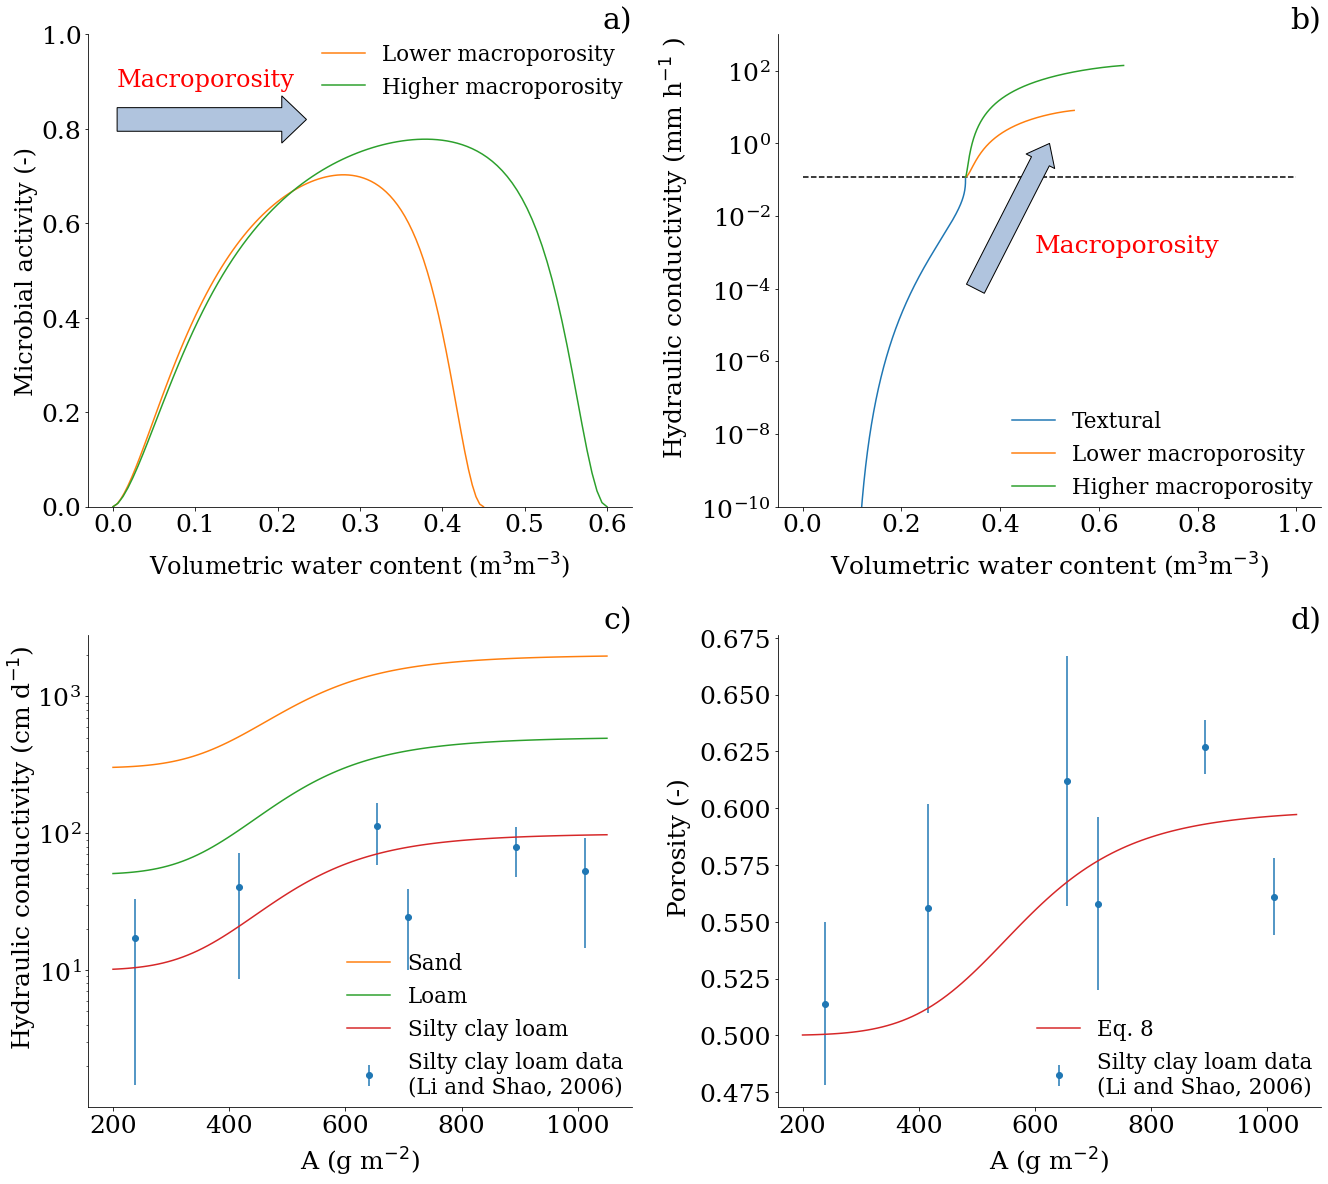

In [14]:
fig = plt.figure(figsize=(19, 17))

# # Microbial activity v/s Volumetric water content
ax1 = fig.add_subplot(221)
theta, u = plot_func()
theta1, u1 = plot_func2()
ax1.plot(theta,u,label= 'Lower macroporosity',color= 'tab:orange')
ax1.plot(theta1,u1,label= 'Higher macroporosity',color= 'tab:green')
ax1.set_xlabel('Volumetric water content (m$^{3}$m$^{-3}$)', fontsize = 24)
ax1.set_ylabel('Microbial activity (-)', fontsize = 24)
ax1.set_ylim(0, 1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(frameon=False, loc="upper right")
plt.arrow(0.005, 0.82, 0.2, 0, head_width=0.10, width = 0.05, head_length=0.03, facecolor='lightsteelblue')
plt.text(0.005, 0.89, 'Macroporosity', color='red', fontsize = 24)
ax1.xaxis.set_label_coords(0.50, -0.09)
plt.title('a)',loc= 'right')
plt.tight_layout()


# # Hydraulic conductivity v/s Volumetric water content
theta= np.linspace(0.01,0.33,2000)
theta2 = np.linspace(0.33,0.65,2000)
y= A['kstex']
kmm=[tex(theta,**P)for theta in theta]
kpp=[struct(theta2,**M)for theta2 in theta2]
kpp2=[struct(theta2,**M2)for theta2 in theta2]
ax2 = fig.add_subplot(222)
ax2.plot(theta,kmm, label = 'Textural')
ax2.plot(theta2,kpp, label = 'Lower macroporosity')
ax2.plot(theta2,kpp2, label = 'Higher macroporosity')
ax2.hlines(y, 0, 1, linestyle = '--', color = 'k', lw = 1.5)
ax2.set_ylim(10**-10, 10**3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yscale("log")
ax2.set_ylabel('Hydraulic conductivity (mm h$^{-1}$ )', fontsize = 25)
ax2.set_xlabel('Volumetric water content (m$^{3}$m$^{-3}$)', fontsize = 25)
plt.legend(frameon= False, loc = 4)
plt.annotate('', xy=(0.5, 1), xytext=(0.35, 10**-4), 
            arrowprops=dict(facecolor='lightsteelblue', width= 20, headwidth= 32, headlength= 20))
plt.text(0.47, 10**-3, 'Macroporosity', color = 'red' ,fontsize = 25)
ax2.xaxis.set_label_coords(0.50, -0.09)
ax2.yaxis.set_label_coords(-0.16, 0.55)
plt.title('b)',loc= 'right')
plt.tight_layout()


# # Hydraulic conductivity v/s Aggregated carbon
ax3 = fig.add_subplot(223)
f = np.linspace(200,1050,100)
y = [ktot(f,**S1)for f in f]
L = [ktot(f,**S2)for f in f]
N = [ktot(f,**S4)for f in f]
ax3.errorbar(Z, t, e2, linestyle='None', marker='o', label="Silty clay loam data\n(Li and Shao, 2006)")
ax3.set_ylabel('Hydraulic conductivity (cm d$^{-1}$)', fontsize = 25)
ax3.set_xlabel('A (g m$^{-2}$)', fontsize = 25)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_yscale("log")
ax3.plot(f,y, label = 'Sand')
ax3.plot(f,L, label = 'Loam')
ax3.plot(f,N, label = 'Silty clay loam')
plt.legend(frameon= False, loc = 4)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.xaxis.set_label_coords(0.50, -0.08)
ax3.yaxis.set_label_coords(-0.09, 0.55)
plt.title('c)',loc= 'right')
plt.tight_layout()


# # Porosity v/s Aggregated carbon
ax4 = fig.add_subplot(224)
g = np.linspace(200,1050,100)
w = [phit(g,**C)for g in g]
ax4.errorbar(Z, t1, e21, linestyle='None', marker='o', label="Silty clay loam data\n(Li and Shao, 2006)")
ax4.set_ylabel('Porosity (-)', fontsize = 25)
ax4.set_xlabel('A (g m$^{-2}$)', fontsize = 25)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.plot(g,w,color= 'tab:red', label = 'Eq. 8')
plt.legend(frameon= False, loc = 4)
ax4.xaxis.set_label_coords(0.50, -0.08)
ax4.yaxis.set_label_coords(-0.16, 0.55)
plt.title('d)',loc= 'right')
plt.tight_layout()

